In [13]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
adata = sc.read(f'sagittal.h5ad', library_id='P1')
adata

AnnData object with n_obs × n_vars = 91246 × 1022
    obs: 'region'
    uns: 'region_colors'
    obsm: 'spatial'

In [15]:
adata.obsm['spatial'] = np.column_stack((adata.obsm['spatial'][:, 0], adata.obsm['spatial'][:, 1]))

/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


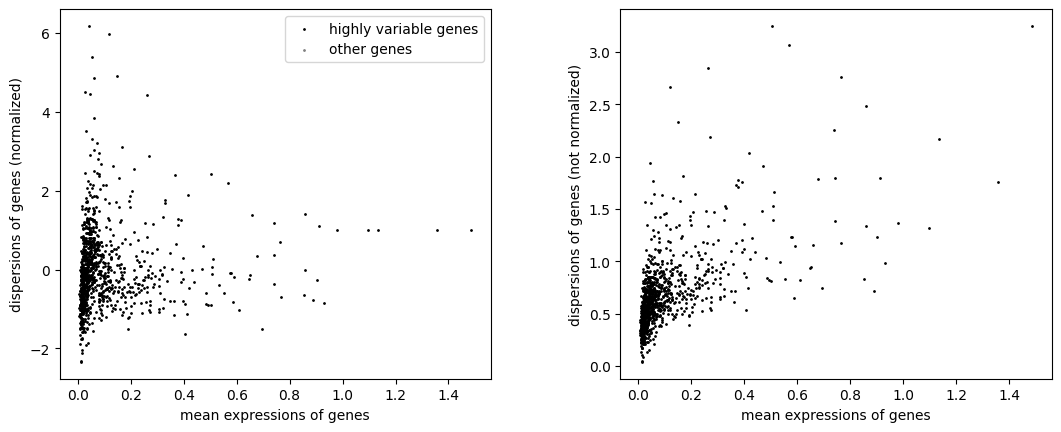

In [16]:
adata1 = adata.copy()
sc.pp.filter_cells(adata1, min_genes=1)
sc.pp.filter_genes(adata1, min_counts=1)
adata1.layers["counts"] = adata1.X.copy()
sc.pp.normalize_total(adata1)
sc.pp.log1p(adata1)
sc.pp.highly_variable_genes(adata1, n_top_genes=3000)
sc.pl.highly_variable_genes(adata1, show=False)
adata1 = adata1[:, adata1.var['highly_variable']]
sc.pp.scale(adata1, max_value=10)
sc.tl.pca(adata1, svd_solver='arpack',n_comps=64)

In [18]:
import os
import numpy as np
import torch
import pandas as pd
from sklearn import metrics
import multiprocessing as mp
from GARDEN import GARDEN
import scanpy as sc
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
os.environ['R_HOME'] = "/home/zhangxinming/anaconda3/envs/Test/lib/R"

In [19]:
def permutation(feature):
    ids = np.arange(feature.shape[0])
    ids = np.random.permutation(ids)
    feature_permutated = feature[ids]
    return feature_permutated 

adata1.obsm['feat'] = adata1.obsm['X_pca']
adata1.obsm['feat_a'] = permutation(adata1.obsm['feat'])

In [ ]:
model = GARDEN.GARDEN_Batch(adata1,k_dynamic=8,device=device,k_cl=8,dim_output=32,model_select = 'KNN', datatype='HD')
# train model
adata1 = model.train_expand(batch_number=8)

Graph_2 Construction
The graph contains 729968 edges, 91246 cells.
8.0000 neighbors per cell on average.
No adj in high throughout
Batch : 0 Preprocessing


/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 79842 edges, 11406 cells.
7.0000 neighbors per cell on average.
Over!
Batch : 1 Preprocessing


/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 79842 edges, 11406 cells.
7.0000 neighbors per cell on average.
Over!
Batch : 2 Preprocessing


/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 79842 edges, 11406 cells.
7.0000 neighbors per cell on average.
Over!
Batch : 3 Preprocessing


/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 79842 edges, 11406 cells.
7.0000 neighbors per cell on average.
Over!
Batch : 4 Preprocessing


/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 79842 edges, 11406 cells.
7.0000 neighbors per cell on average.
Over!
Batch : 5 Preprocessing


/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 79842 edges, 11406 cells.
7.0000 neighbors per cell on average.
Over!
Batch : 6 Preprocessing


/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 79842 edges, 11406 cells.
7.0000 neighbors per cell on average.
Over!
Batch : 7 Preprocessing


/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 79828 edges, 11404 cells.
7.0000 neighbors per cell on average.
Over!
Begin to train ST data...


  0%|          | 2/800 [00:01<07:39,  1.74it/s]

Epoch 0, Overall Loss: 238424.9004


 13%|█▎        | 102/800 [00:18<02:01,  5.75it/s]

Epoch 100, Overall Loss: 647.7319


 25%|██▌       | 202/800 [00:36<01:44,  5.75it/s]

Epoch 200, Overall Loss: 199.5170


 38%|███▊      | 302/800 [00:53<01:27,  5.72it/s]

Epoch 300, Overall Loss: 164.8695


 50%|█████     | 402/800 [01:11<01:09,  5.70it/s]

Epoch 400, Overall Loss: 156.2044


 63%|██████▎   | 502/800 [01:28<00:52,  5.70it/s]

Epoch 500, Overall Loss: 150.5299


 75%|███████▌  | 602/800 [01:46<00:34,  5.70it/s]

Epoch 600, Overall Loss: 164.9080


 88%|████████▊ | 702/800 [02:03<00:17,  5.69it/s]

Epoch 700, Overall Loss: 150.8973


100%|██████████| 800/800 [02:20<00:00,  5.68it/s]


Optimization finished for ST data!


In [21]:
n_clusters = 17
radius = 0
tool = 'mclust' # mclust, leiden, and louvain

# clustering
from GARDEN.utils import clustering

if tool == 'mclust':
   clustering(adata1, n_clusters, radius=radius, method=tool, refinement=False) # For DLPFC dataset, we use optional refinement step.
elif tool in ['leiden', 'louvain']:
   clustering(adata1, n_clusters, radius=radius, method=tool, start=0.1, end=0.6, increment=0.01, refinement=False)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


In [27]:
adata1.obsm['spatial'] = adata.obsm['spatial'] 

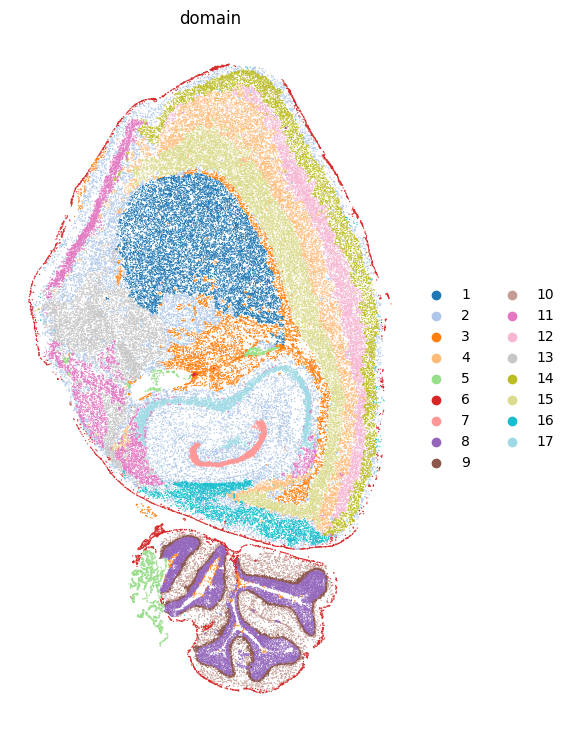

In [28]:
plt.rcParams["figure.figsize"] = (12, 9)
sc.pl.spatial(adata1,basis='spatial',color = 'domain',frameon = False,colorbar_loc=None,spot_size = 100, palette='tab20')